# Ex 1

1. Pe modelul polinomial din curs (cursul 11), în codul care generează datele (din fişierul date.csv), schim-
baţi order=2 cu o altă valoare, de exemplu order=5.

    a. Faceţi apoi inferenţa cu model_p şi reprezentaţi grafic această curbă.

    

Saving date.csv to date (1).csv


Output()

Output()

ERROR:pymc.stats.convergence:There were 34 divergences after tuning. Increase `target_accept` or reparameterize.


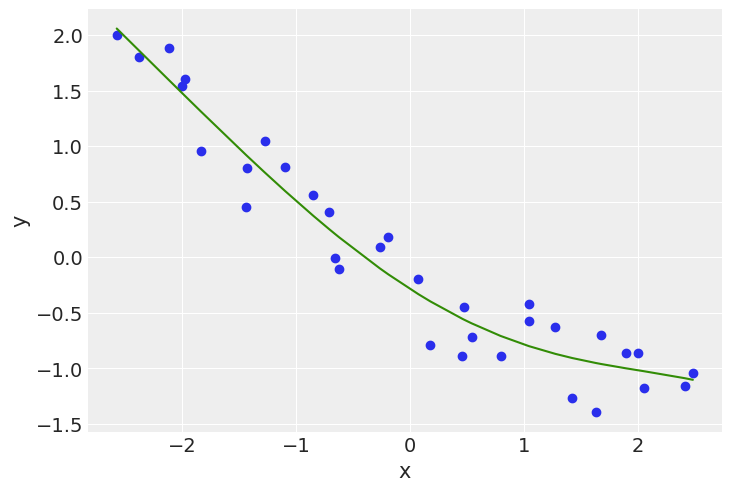

In [14]:
import pymc as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
az.style.use('arviz-darkgrid')

from google.colab import files
uploaded = files.upload()
dummy_data = np.loadtxt('date.csv', delimiter=" ")

x_1 = dummy_data[:, 0]
y_1 = dummy_data[:, 1]
order = 5
x_1p = np.vstack([x_1**i for i
in range(1, order+1)])
x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True))
x_1p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()
plt.scatter(x_1s[0], y_1s)
plt.xlabel('x')
plt.ylabel('y')

with pm.Model() as model_p:
  α = pm.Normal('α', mu=0, sigma=1)
  β = pm.Normal('β', mu=0, sigma=10, shape=order)
  ε = pm.HalfNormal('ε', 5)
  μ = α + pm.math.dot(β, x_1s)
  y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_1s)
  idata_p = pm.sample(2000, return_inferencedata=True)

x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)

α_p_post = idata_p.posterior['α'].mean(("chain", "draw")).values
β_p_post = idata_p.posterior['β'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_p_post = α_p_post + np.dot(β_p_post, x_1s)

plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')

b. Repetaţi, dar folosind o distribuţie pentru beta cu sd=100 în loc de sd=10. În ce fel sunt curbele
diferite? Încercaţi acest lucru şi cu sd=np.array([10, 0.1, 0.1, 0.1, 0.1]).


Saving date.csv to date (2).csv


Output()

Output()

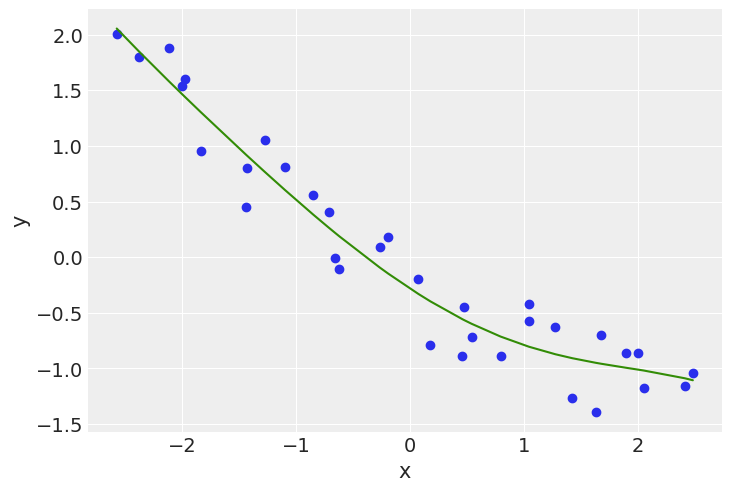

In [15]:
import pymc as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
az.style.use('arviz-darkgrid')

from google.colab import files
uploaded = files.upload()
dummy_data = np.loadtxt('date.csv', delimiter=" ")

x_1 = dummy_data[:, 0]
y_1 = dummy_data[:, 1]
order = 5
x_1p = np.vstack([x_1**i for i
in range(1, order+1)])
x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True))
x_1p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()
plt.scatter(x_1s[0], y_1s)
plt.xlabel('x')
plt.ylabel('y')

with pm.Model() as model_p:
  α = pm.Normal('α', mu=0, sigma=1)
  β = pm.Normal('β', mu=0, sigma=100, shape=order)
  ε = pm.HalfNormal('ε', 5)
  μ = α + pm.math.dot(β, x_1s)
  y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_1s)
  idata_p = pm.sample(2000, return_inferencedata=True)

x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)

α_p_post = idata_p.posterior['α'].mean(("chain", "draw")).values
β_p_post = idata_p.posterior['β'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_p_post = α_p_post + np.dot(β_p_post, x_1s)

plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')

2. Repetaţi exerciţiul precedent, dar creşteţi numărul de date la 500 de puncte.


Saving date.csv to date (3).csv


Output()

Output()

ERROR:pymc.stats.convergence:There were 15 divergences after tuning. Increase `target_accept` or reparameterize.


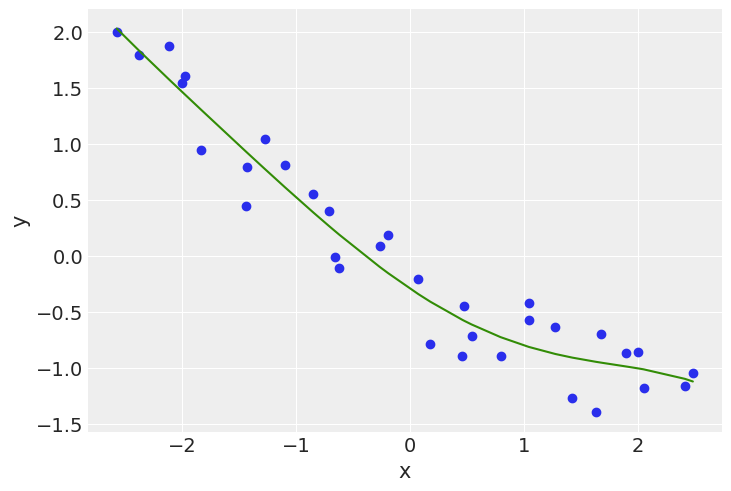

In [16]:
import pymc as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
az.style.use('arviz-darkgrid')

from google.colab import files
uploaded = files.upload()
dummy_data = np.loadtxt('date.csv', delimiter=" ")

x_1 = dummy_data[:, 0]
y_1 = dummy_data[:, 1]
order = 5
x_1p = np.vstack([x_1**i for i
in range(1, order+1)])
x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True))
x_1p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()
plt.scatter(x_1s[0], y_1s)
plt.xlabel('x')
plt.ylabel('y')

with pm.Model() as model_p:
  α = pm.Normal('α', mu=0, sigma=1)
  β = pm.Normal('β', mu=0, sigma=np.array([10, 0.1, 0.1, 0.1, 0.1]), shape=order)
  ε = pm.HalfNormal('ε', 5)
  μ = α + pm.math.dot(β, x_1s)
  y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y_1s)
  idata_p = pm.sample(2000, return_inferencedata=True)

x_new = np.linspace(x_1s[0].min(), x_1s[0].max(), 100)

α_p_post = idata_p.posterior['α'].mean(("chain", "draw")).values
β_p_post = idata_p.posterior['β'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_p_post = α_p_post + np.dot(β_p_post, x_1s)

plt.plot(x_1s[0][idx], y_p_post[idx], 'C2', label=f'model order {order}')

# Ex 2

Un profesor doreşte să înţeleagă relaţia dintre numărul de ore de studiu şi nota finală a studenţilor la
un examen. Se suspectează că această relaţie nu este liniară, dar nu se ştie exact ce formă ar trebui să aibă.
Poate fi o relaţie liniară, pătratică sau chiar cubică. În fişierul date_studiu_nota.csv este considerat un set de
date cu 100 de observaţii care descriu relaţia dintre orele de studiu şi nota finală.
1. Să se modeleze relaţia dintre orele de studiu şi nota finală folosind regresia polinomială.
2. Care model, liniar, pătratic sau cubic, se potriveşte mai bine pe datele observate? Justificaţi acest lucru
folosind criterii bayesiene, cum ar fi WAIC şi/sau LOO.

In [ ]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()
data = pd.read_csv("date_studiu_nota.csv")
x = data['Ore_Studiu'].values
y = data['Nota_Finala'].values

x_s = (x - np.mean(x)) / np.std(x)
y_s = (y - np.mean(y)) / np.std(y)

orders = [1, 2, 3]
models = []
idatas = []

for order in orders:
    x_poly = np.vstack([x_s**i for i in range(1, order + 1)])
    with pm.Model() as model:
        α = pm.Normal("α", mu=0, sigma=1)
        β = pm.Normal("β", mu=0, sigma=10, shape=order)
        ε = pm.HalfNormal("ε", sigma=1)

        μ = α + pm.math.dot(β, x_poly)
        y_obs = pm.Normal("y_obs", mu=μ, sigma=ε, observed=y_s)

        pm.Deterministic("log_likelihood", pm.logp(y_obs, y_s))

        idata = pm.sample(2000, return_inferencedata=True)
        idata.add_groups({"log_likelihood": idata.sample_stats["log_likelihood"]})

        idatas.append(idata)
        models.append(model)

model_comparison = az.compare(dict(zip(["Liniar", "Patratic", "Cubic"], idatas)), method="BB-pseudo-BMA")
print(model_comparison)

plt.figure(figsize=(10, 6))
x_new = np.linspace(x_s.min(), x_s.max(), 100)

for order, idata, label in zip(orders, idatas, ["Liniar", "Patratic", "Cubic"]):
    α_post = idata.posterior["α"].mean(("chain", "draw")).values
    β_post = idata.posterior["β"].mean(("chain", "draw")).values
    y_post = α_post + sum(β_post[i] * x_new**(i + 1) for i in range(order))

    plt.plot(x_new, y_post, label=label)

plt.scatter(x_s, y_s, alpha=0.5, label="Date Observate")
plt.xlabel("Ore de studiu (standardizate)")
plt.ylabel("Nota finala (standardizata)")
plt.legend()
plt.title("Regresia polinomiala")
plt.show()
